<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 40px; text-indent: 340px">
            Metal furnace
        <p>    
    </body>
</html>

<img src="https://www.mining.com/wp-content/uploads/2021/06/Iron-smelting-steel-scaled.jpeg" width=500/>

# Описание

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px" >
            Производство металлических сплавов - сложный технологический процесс. При их изготовлении учитывается множество параметров: температура плавления металла, наличие примесей, температура охлаждения сплава и т.д.
        </p>    
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            Любое незначительное изменение параметров в конечном итоге может повлиять на качество или марку производимого сплава.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Задача:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            Построить модель машинного обучения, которая может предсказать качество продукта с использованием 28-ми анонимизированных параметров, которые обозначены от f0 до f27.
        <p>
    </body>
</html>

[Ссылка](https://www.kaggle.com/esotericazzo/metal-furnace-dataset) на датасет.

# Импорт библиотек

In [1]:
random_state = 10

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy import interp
from itertools import cycle


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, \
    confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, make_scorer

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook

# Загрузка датасета, краткое описание

In [2]:
df = pd.read_csv('../data/pet_project/Metal_Furnace_/Metal_Furnace_Dataset_Train.csv')

df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [3]:
# Краткое описание датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      620 non-null    float64
 1   f1      620 non-null    float64
 2   f2      620 non-null    float64
 3   f3      620 non-null    float64
 4   f4      620 non-null    float64
 5   f5      620 non-null    float64
 6   f6      620 non-null    float64
 7   f7      620 non-null    float64
 8   f8      620 non-null    float64
 9   f9      620 non-null    float64
 10  f10     620 non-null    float64
 11  f11     620 non-null    float64
 12  f12     620 non-null    float64
 13  f13     620 non-null    float64
 14  f14     620 non-null    float64
 15  f15     620 non-null    float64
 16  f16     620 non-null    float64
 17  f17     620 non-null    float64
 18  f18     620 non-null    float64
 19  f19     620 non-null    float64
 20  f20     620 non-null    float64
 21  f21     620 non-null    float64
 22  f2

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            1) Всего 620 позиций;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            2) 28 параметров;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            3) Все параметры числовые типа float;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            4) Пропуски отсутствуют.
    </body>
</html>

In [4]:
# Проверка на наличие дубликатов
df.duplicated().sum()

3

In [5]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)

# EDA

In [6]:
# Основные описательные статистики
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,617.0,0.001845,1.001925,-0.825098,-0.825098,-0.379487,0.511733,2.294174
f1,617.0,0.001285,1.003071,-0.264250,-0.264250,-0.264250,-0.264250,4.920404
f2,617.0,0.002244,1.002722,-0.461423,-0.461423,-0.461423,-0.461423,3.032397
f3,617.0,-0.001991,1.002833,-2.442599,0.409400,0.409400,0.409400,0.409400
f4,617.0,0.002556,1.002567,-2.356907,-0.525726,-0.525726,1.305455,1.305455
f5,617.0,0.001343,1.003055,-0.276144,-0.276144,-0.276144,-0.276144,5.607339
f6,617.0,0.003167,0.997116,-2.695676,0.370965,0.370965,0.370965,0.370965
f7,617.0,-0.000438,1.003222,-11.090537,0.090167,0.090167,0.090167,0.090167
f8,617.0,-0.000525,1.003213,-13.278881,0.107958,0.107958,0.107958,0.107958
f9,617.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            Стандартное отклонение всех параметров равно 1, а среднее равно 0. Вероятней всего, это означает что данные масштабированы. Стоит посмотреть распределения всех параметров. Параметр f9 представлен 0-ми значениями, его можно удалить.
    </body>
</html>

In [7]:
df = df.drop('f9', axis=1)

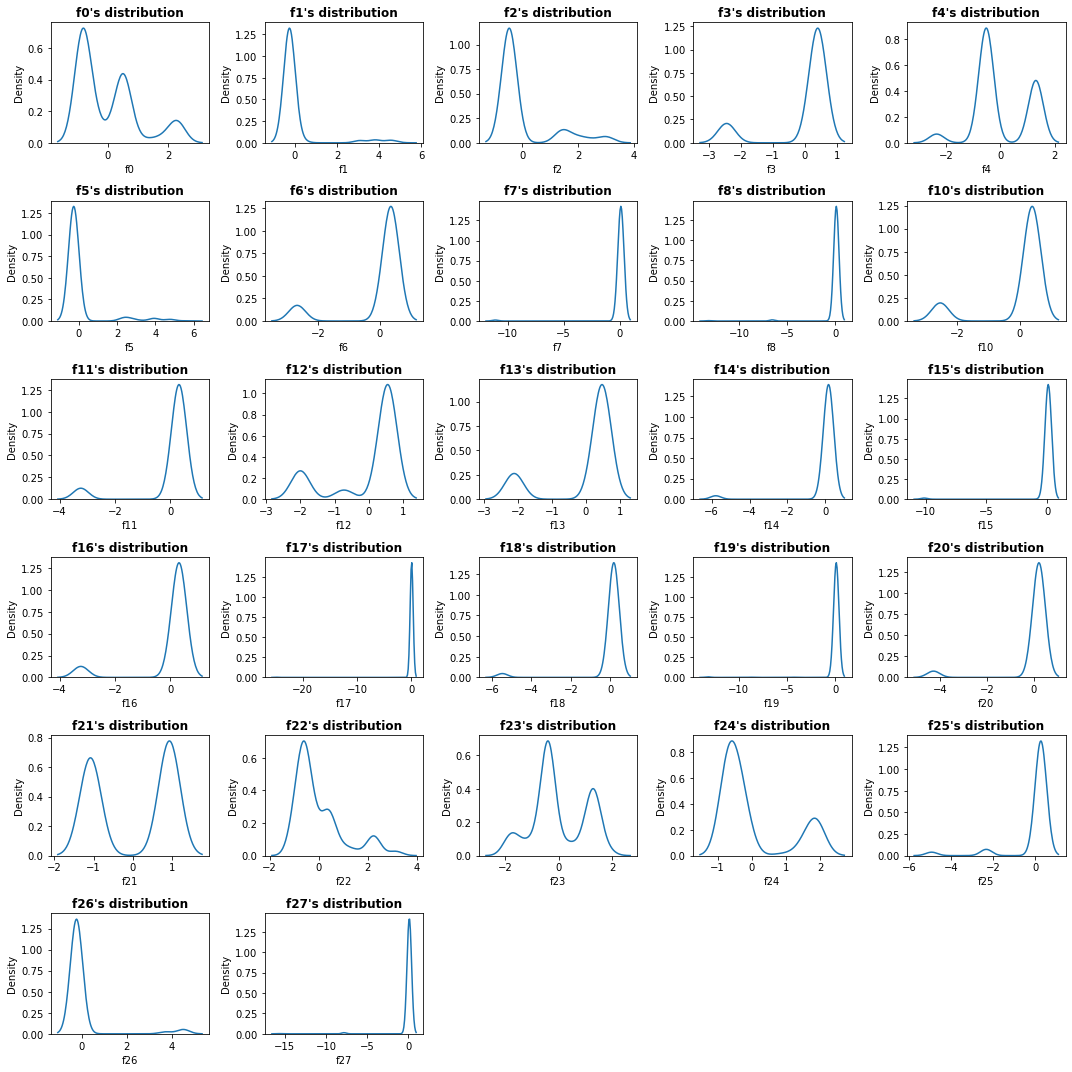

In [8]:
# Отображение распределений для всех параметров
def plot_kde(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(15,15))
    
    for i, param_name in enumerate(variables[:-1]):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.kdeplot(df[param_name], ax=ax)
        ax.set_title(f"{param_name}'s distribution", weight='bold')
        fig.tight_layout()
        plt.grid(False)
    
    plt.show()

plot_kde(df, df.columns, 6, 5)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            Часть параметров имеют бимодальные распределения. Стоит взглянуть на параметры при помощи countplot графиков.
    </body>
</html>

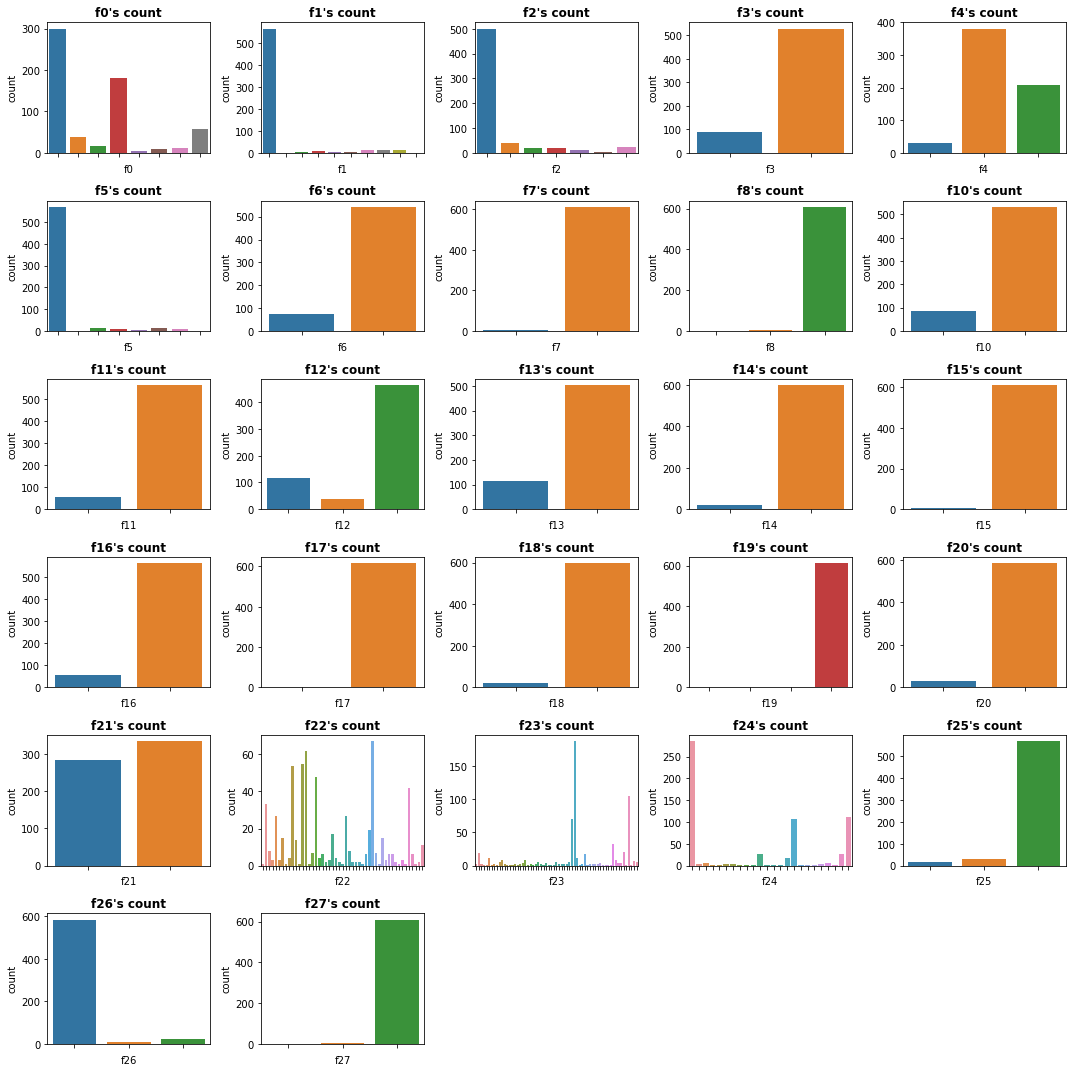

In [9]:
# Отображение countplot для всех параметров
def plot_count(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(15,15))
    
    for i, param_name in enumerate(variables[:-1]):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.countplot(df[param_name], ax=ax)
        ax.set_title(f"{param_name}'s count", weight='bold')
        ax.set_xticklabels([])
        fig.tight_layout()
        plt.grid(False)
    
    plt.show()

plot_count(df, df.columns, 6, 5)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            Можно предположить, что бОльшая часть параметров - категориальные данные. Посмотрим на корреляцию между параметрами.
    </body>
</html>

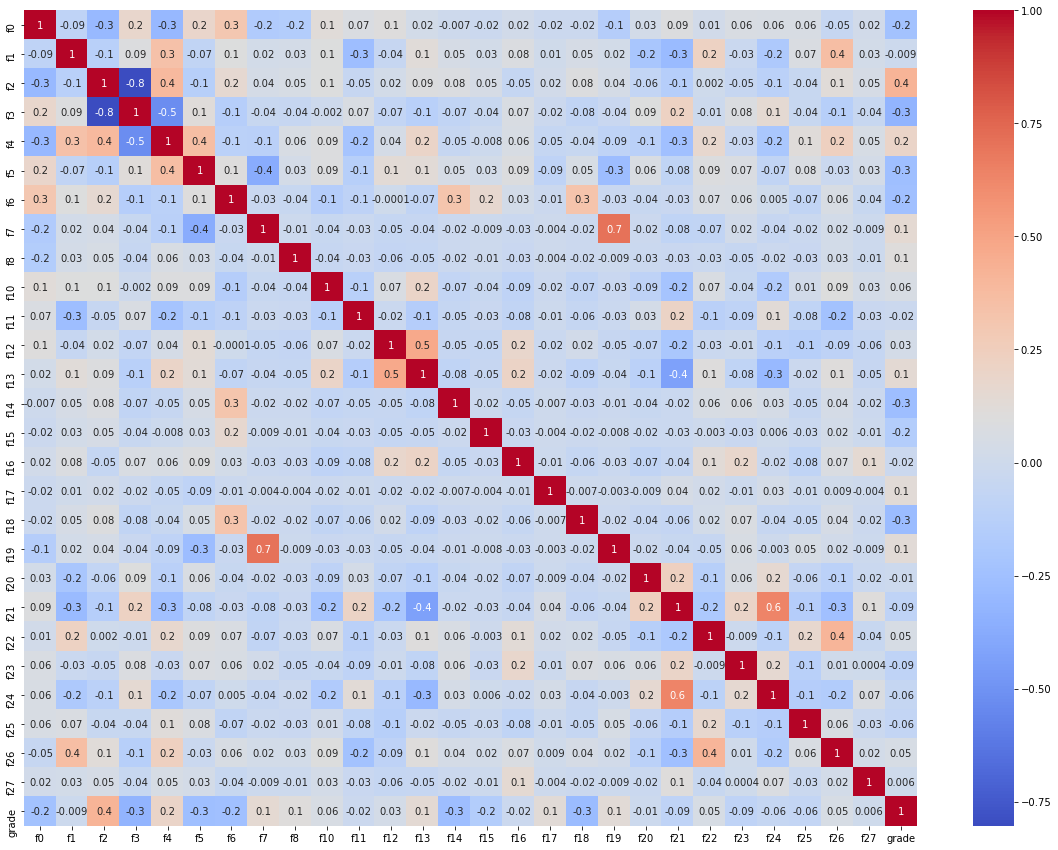

In [10]:
# Отображение heatmap корреляции для рассмотрения зависимостей между параметрами
plt.figure(figsize=(20, 15))

sns.heatmap(df.corr(), cmap='coolwarm', fmt='.1g', annot=True);

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Присутствуют как отрицательные, так и положительные корреляции между параметрами.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Высокие и средние отрицательные корреляции между параметрами f2-f3, f4-f3.      
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Высокие и средние положительные корреляции между параметрами f7-f19, f12-f13, f21-f24
    </body>
</html>

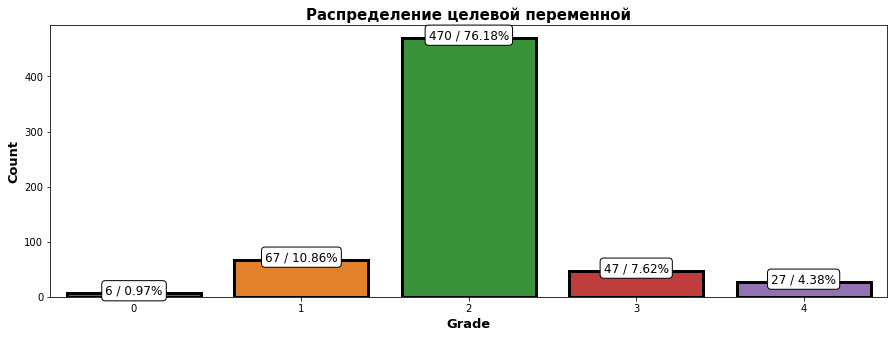

In [11]:
# Отображение распределения целевой переменной
count = df.grade.count()

plt.subplots(figsize=(15, 5))
ax = sns.countplot(df.grade, edgecolor='black', linewidth=3)

ax.set_xlabel('Grade', weight='bold', size=13)
ax.set_ylabel('Count', weight='bold', size=13)
ax.set_title(f"Распределение целевой переменной", size=15, weight='bold')

for patch in ax.patches:
    x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / count * 100:.2f}%', \
            va='center', ha='center', size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'})

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Присутствует дисбаланс классов, что следует учесть при построении моделей.
    </body>
</html>

# Построение моделей

In [12]:
# Разбивка данных на train/test
X = df.drop('grade', axis=1)
y = df['grade'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=random_state)

n_classes = len(set(y))
y_test_bin = label_binarize(y_test, classes=list(set(y)))

In [13]:
# Функция для расчета метрик многоклассовой классификации
def get_score_clf(y_test, y_test_bin, y_pred, y_score):
    return round(roc_auc_score(y_test_bin, y_score, multi_class='ovr'), 3), \
        round(precision_score(y_test, y_pred, average='micro'), 3), \
        round(precision_score(y_test, y_pred, average='macro'), 3), \
        round(recall_score(y_test, y_pred, average='micro'), 3), \
        round(recall_score(y_test, y_pred, average='macro'), 3), \
        round(f1_score(y_test, y_pred, average='micro'), 3), \
        round(f1_score(y_test, y_pred, average='macro'), 3)

In [14]:
# Фрейм для метрик
index = ['roc_auc_score', 'precision micro', 'precision macro', 'recall micro',
         'recall macro', 'f1 micro', 'f1 macro']
metrics_class = pd.DataFrame(index=index)

In [15]:
# Функция для построения roc_curve
def plot_roc_curve():
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 5

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(
        y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(7, 7))

    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

## LogisticRegression

### Baseline

In [16]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)

metrics_class['LR_baseline'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline
roc_auc_score,0.924
precision micro,0.748
precision macro,0.605
recall micro,0.748
recall macro,0.867
f1 micro,0.748
f1 macro,0.673


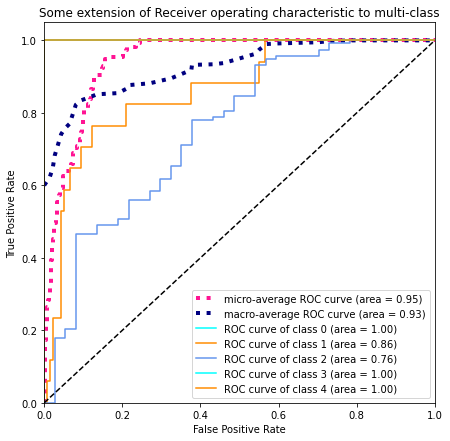

In [17]:
# ROC-AUC кривые
plot_roc_curve()

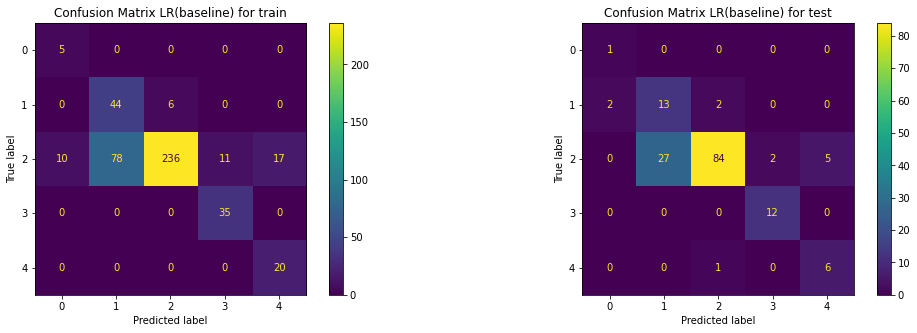

In [18]:
# Сonfusion_matrix для train/test данных
fig, ax = plt.subplots(1,2, figsize=(18, 5))

ax[0].set_title('Confusion Matrix LR(baseline) for train')
plot_confusion_matrix(lr, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix LR(baseline) for test')
plot_confusion_matrix(lr, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 15px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Baseline модель логистической регрессии способна разделять классы.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Но, из условия задачи точно неизвестно, на какие классы следует обратить больше внимания и что важнее для будущего классификатора - сделать как можно больше оценок качества сплавов, в случае невысокой цены ошибки, или же, цена ошибки слишкой высокая, и тогда следует уделить внимание точности.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Допустим, больше внимания хотим уделить наибольшим классам, и тогда, в случае логистической регрессии рассмотрим три варианта.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Первый - будем стремиться исключить или свести к минимуму долю ложных срабатываний (FP), т.е. увеличить precision метрику.
         </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Второй - будем стремиться исключить или свести к минимуму долю ложных пропусков (FN), и соответственно, увеличить recall метрику.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 15px; text-indent: 50px">
            Третий - усредненный вариант, будем отталкиваться от f1 метрики.
    </body>
</html>

### Подбор параметров, GridSearch

#### Precision

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Далее будут построены графики зависимости метрики precision от нескольких параметров с целью дальнейшего поиска по сетке.
    </body>
</html>

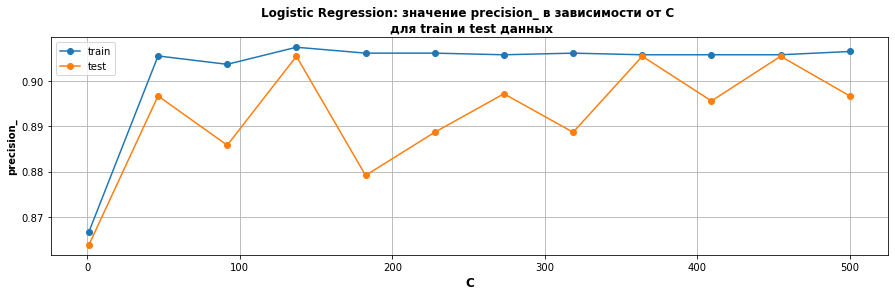

In [19]:
# 'C': [91.7, 137.1, 273.2, 363.9, 454.6]

def get_score_model(clf, X, y):
    score = clf.predict(X)
    return precision_score(y, score, average='weighted')

param = 'C'
train_scores, test_scores = [], []
values = np.linspace(1.0, 500.0, num=12)

for num, i in enumerate(values):
    model = LogisticRegression(C=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('precision_', weight='bold')
plt.title(f"Logistic Regression: значение precision_ в зависимости от {param} \n для train и test данных",
          weight='bold')
plt.grid()
plt.legend()
plt.show()

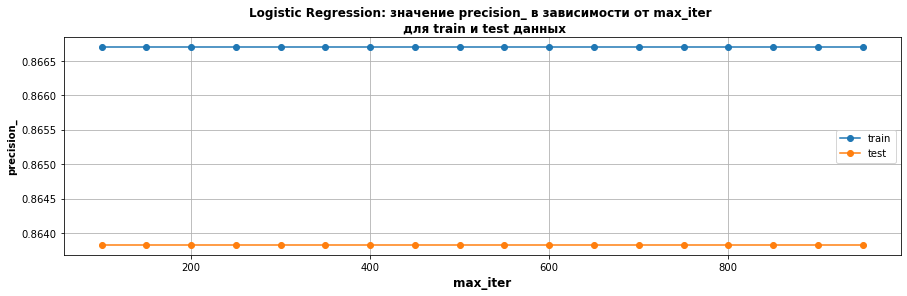

In [20]:
# 'max_iter' : default

param = 'max_iter'
train_scores, test_scores = [], []
values = np.arange(100, 1000, 50)
            
for num, i in enumerate(values):
    model = LogisticRegression(max_iter=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('precision_', weight='bold')
plt.title(f'Logistic Regression: значение precision_ в зависимости от {param} \n для train и test данных',
          weight='bold')
plt.grid()
plt.legend()
plt.show()

In [21]:
scoring = make_scorer(precision_score, average='weighted')

parameters_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': [91.7, 137.1, 273.2, 363.9, 454.6],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial', 'auto']
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring=scoring, cv=cv, verbose=1)

In [22]:
%%time
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 4min, sys: 1.72 s, total: 4min 2s
Wall time: 3min 39s


{'C': 454.6, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [23]:
model_gs = grid_cv.best_estimator_
model_gs.fit(X_train, y_train)

y_pred = model_gs.predict(X_test)
y_score = model_gs.predict_proba(X_test)

In [24]:
metrics_class['LR_GS_pr'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr
roc_auc_score,0.924,0.958
precision micro,0.748,0.781
precision macro,0.605,0.845
recall micro,0.748,0.781
recall macro,0.867,0.895
f1 micro,0.748,0.781
f1 macro,0.673,0.841


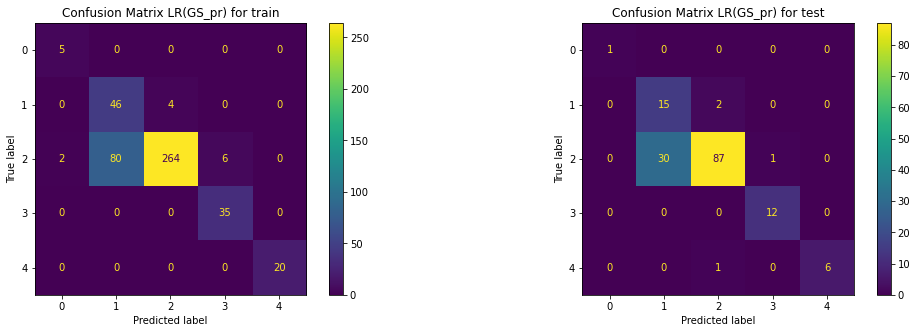

In [25]:
# Сonfusion_matrix
fig, ax = plt.subplots(1,2, figsize=(18, 5))

ax[0].set_title('Confusion Matrix LR(GS_pr) for train')
plot_confusion_matrix(model_gs, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix LR(GS_pr) for test')
plot_confusion_matrix(model_gs, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Сведено к минимуму количество FP у самого наибольшего класса. 
    </body>
</html>

#### Recall

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Далее будут построены графики зависимости метрики recall от нескольких параметров с целью дальнейшего поиска по сетке.
    </body>
</html>

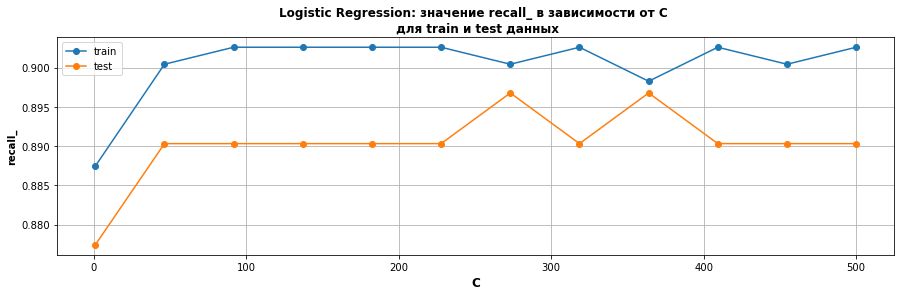

In [26]:
# 'C': [91.7, 137.1, 273.2, 363.9, 409.2]

def get_score_model(clf, X, y):
    score = clf.predict(X)
    return recall_score(y, score, average='weighted')

param = 'C'
train_scores, test_scores = [], []
values = np.linspace(1.0, 500.0, num=12)
            
for num, i in enumerate(values):
    model = LogisticRegression(C=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('recall_', weight='bold')
plt.title(f'Logistic Regression: значение recall_ в зависимости от {param} \n для train и test данных',
          weight='bold')
plt.grid()
plt.legend()
plt.show()

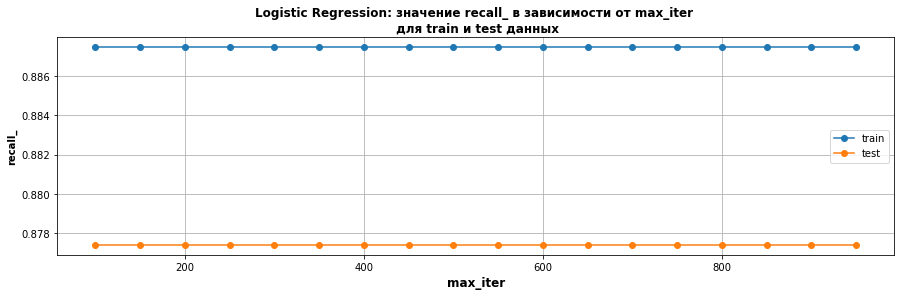

In [27]:
# 'max_iter' - default

param = 'max_iter'
train_scores, test_scores = [], []
values = np.arange(100, 1000, 50)
            
for num, i in enumerate(values):
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('recall_', weight='bold')
plt.title(f'Logistic Regression: значение recall_ в зависимости от {param} \n для train и test данных',
          weight='bold')
plt.grid()
plt.legend()
plt.show()

In [28]:
scoring = make_scorer(recall_score, average='weighted')

parameters_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': [91.7, 137.1, 273.2, 363.9, 409.2],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial', 'auto']
}

lr = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring=scoring, cv=cv, verbose=1)

In [29]:
%%time
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 3min 29s, sys: 1.47 s, total: 3min 30s
Wall time: 3min 4s


{'C': 137.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [30]:
model_gs = grid_cv.best_estimator_
model_gs.fit(X_train, y_train)

y_pred = model_gs.predict(X_test)
y_score = model_gs.predict_proba(X_test)

In [31]:
metrics_class['LR_GS_re'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re
roc_auc_score,0.924,0.958,0.960
precision micro,0.748,0.781,0.890
precision macro,0.605,0.845,0.910
recall micro,0.748,0.781,0.890
recall macro,0.867,0.895,0.787
f1 micro,0.748,0.781,0.890
f1 macro,0.673,0.841,0.823


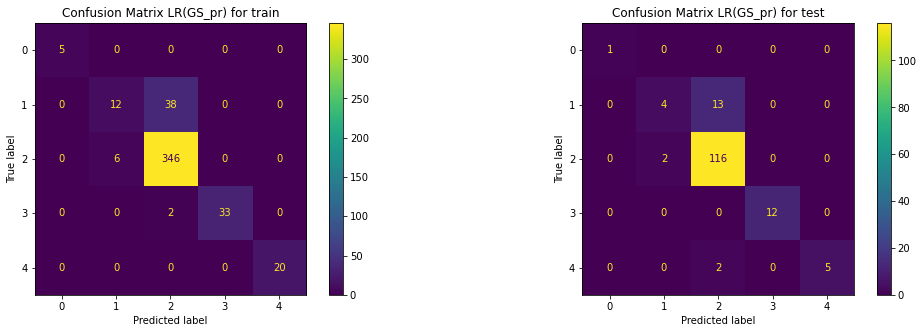

In [32]:
# Сonfusion_matrix
fig, ax = plt.subplots(1,2, figsize=(18, 5))

ax[0].set_title('Confusion Matrix LR(GS_pr) for train')
plot_confusion_matrix(model_gs, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix LR(GS_pr) for test')
plot_confusion_matrix(model_gs, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Сведено к минимуму количество FN у самого наибольшего класса.
    </body>
</html>

#### f1

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Далее будут построены графики зависимости метрики f1 от нескольких параметров с целью дальнейшего поиска по сетке.
    </body>
</html>

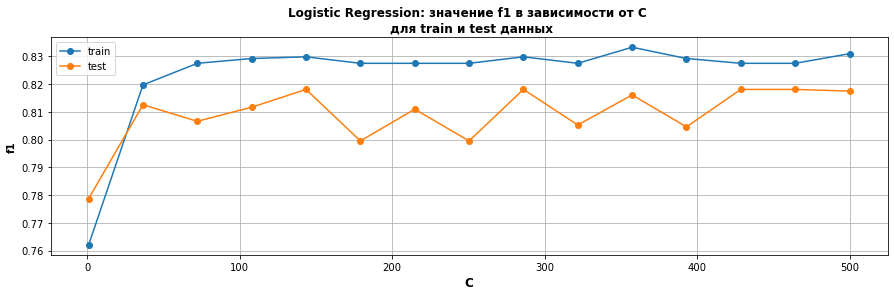

In [33]:
# 'C': [143.5, 214.8, 286.1, 357.4, 428.7]

def get_score_model(clf, X, y):
    score = clf.predict(X)
    return f1_score(y, score, average='weighted')

param = 'C'
train_scores, test_scores = [], []
values = np.linspace(1, 500, num=15)
            
for num, i in enumerate(values):
    model = LogisticRegression(C=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1', weight='bold')
plt.title(f'Logistic Regression: значение f1 в зависимости от {param} \n для train и test данных',
          weight='bold')
plt.grid()
plt.legend()
plt.show()

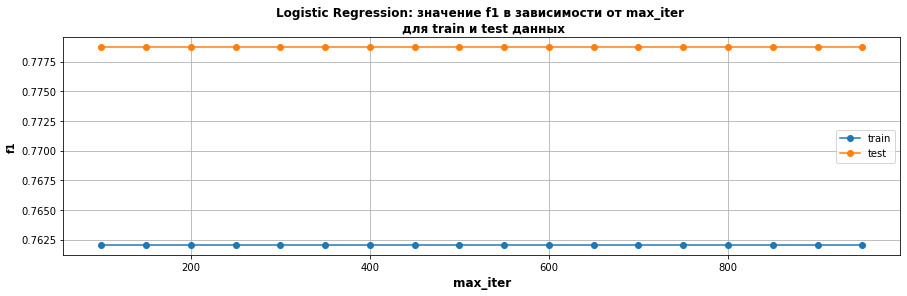

In [34]:
# 'max_iter' - default

param = 'max_iter'
train_scores, test_scores = [], []
values = np.arange(100, 1000, 50)
            
for num, i in enumerate(values):
    model = LogisticRegression(max_iter=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1', weight='bold')
plt.title(f'Logistic Regression: значение f1 в зависимости от {param} \n для train и test данных',
          weight='bold')
plt.grid()
plt.legend()
plt.show()

In [35]:
scoring = make_scorer(f1_score, average='weighted')
parameters_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': [143.5, 214.8, 286.1, 357.4, 428.7],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial', 'auto']
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring=scoring, cv=cv, verbose=1)

In [36]:
%%time
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 4min 23s, sys: 1.01 s, total: 4min 24s
Wall time: 3min 53s


{'C': 286.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
model_gs = grid_cv.best_estimator_
model_gs.fit(X_train, y_train)

y_pred = model_gs.predict(X_test)
y_score = model_gs.predict_proba(X_test)

In [38]:
metrics_class['LR_GS_f1'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1
roc_auc_score,0.924,0.958,0.960,0.972
precision micro,0.748,0.781,0.890,0.832
precision macro,0.605,0.845,0.910,0.861
recall micro,0.748,0.781,0.890,0.832
recall macro,0.867,0.895,0.787,0.842
f1 micro,0.748,0.781,0.890,0.832
f1 macro,0.673,0.841,0.823,0.839


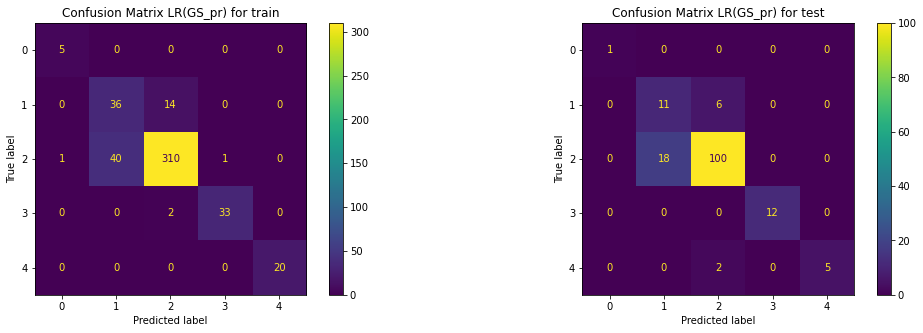

In [39]:
# Сonfusion_matrix
fig, ax = plt.subplots(1,2, figsize=(18, 5))

ax[0].set_title('Confusion Matrix LR(GS_pr) for train')
plot_confusion_matrix(model_gs, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix LR(GS_pr) for test')
plot_confusion_matrix(model_gs, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Как видно из матрицы ошибок, а также на основании метрик, построена модель "усредненного" классификатора. В данной модели присутствует баланс между точностью и полнотой предсказаний.
    </body>
</html>

In [40]:
# Вывод наиболее значимых параметров 

perm = PermutationImportance(model_gs, random_state=1).fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.1939 ± 0.0347,f4
0.1268 ± 0.0328,f2
0.0887 ± 0.0087,f3
0.0602 ± 0.0143,f1
0.0537 ± 0.0127,f5
0.0532 ± 0.0059,f14
0.0515 ± 0.0114,f6
0.0394 ± 0.0079,f10
0.0368 ± 0.0047,f18
0.0268 ± 0.0240,f21


## OneVsRest and OneVsOne

### OneVSRest

In [41]:
lr = LogisticRegression()

ovr = OneVsRestClassifier(lr)
ovr.fit(X_train,y_train)

y_pred = ovr.predict(X_test)
y_score = ovr.decision_function(X_test)

In [42]:
metrics_class['OVR'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1,OVR
roc_auc_score,0.924,0.958,0.960,0.972,0.951
precision micro,0.748,0.781,0.890,0.832,0.871
precision macro,0.605,0.845,0.910,0.861,0.722
recall micro,0.748,0.781,0.890,0.832,0.871
recall macro,0.867,0.895,0.787,0.842,0.519
f1 micro,0.748,0.781,0.890,0.832,0.871
f1 macro,0.673,0.841,0.823,0.839,0.561


### OneVSOne

In [43]:
lr = LogisticRegression()

ovo = OneVsOneClassifier(lr)
ovo.fit(X_train,y_train)

y_pred = ovo.predict(X_test)
y_score = ovo.decision_function(X_test)

In [44]:
metrics_class['OVO'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)
metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1,OVR,OVO
roc_auc_score,0.924,0.958,0.960,0.972,0.951,0.944
precision micro,0.748,0.781,0.890,0.832,0.871,0.877
precision macro,0.605,0.845,0.910,0.861,0.722,0.708
recall micro,0.748,0.781,0.890,0.832,0.871,0.877
recall macro,0.867,0.895,0.787,0.842,0.519,0.558
f1 micro,0.748,0.781,0.890,0.832,0.871,0.877
f1 macro,0.673,0.841,0.823,0.839,0.561,0.600


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Данные алгоритмы показывают приблизительно одинаковые результаты. Рассмотрим деревья решений.
    </body>
</html>

## Деревья решений

### Baseline

In [45]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_score = dtc.predict_proba(X_test)

In [46]:
metrics_class['DTC'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1,OVR,OVO,DTC
roc_auc_score,0.924,0.958,0.960,0.972,0.951,0.944,0.943
precision micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948
precision macro,0.605,0.845,0.910,0.861,0.722,0.708,0.869
recall micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948
recall macro,0.867,0.895,0.787,0.842,0.519,0.558,0.916
f1 micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948
f1 macro,0.673,0.841,0.823,0.839,0.561,0.600,0.869


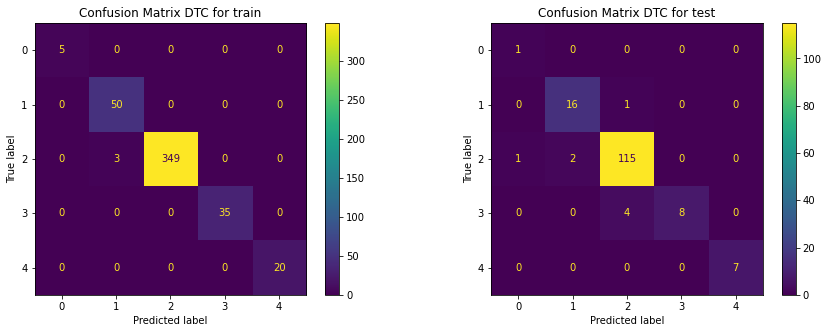

In [47]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].set_title('Confusion Matrix DTC for train')
plot_confusion_matrix(dtc, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix DTC for test')
plot_confusion_matrix(dtc, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            По сравнению с предыдущими алгоритмами baseline DecisionTreeClassifier отработал лучше.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            В случае DecisionTreeClassifier попробуем подобрать параметры таким образом, чтобы работа классификатора была "усреднена", т.е. он должен учитывать и точность и полноту предсказаний.  
    </body>
</html>

### Подбор параметров, Gridsearch

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Далее будут построены графики зависимости метрики recall от нескольких параметров с целью дальнейшего поиска по сетке.
    </body>
</html>

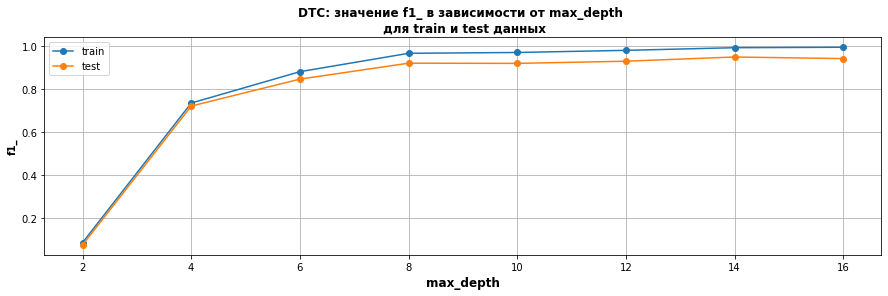

In [48]:
# 'max_depth': [8, 10, 12, 14]

def get_score_model(clf, X, y):
    score = clf.predict(X)
    return f1_score(y, score, average='weighted')

param = 'max_depth'
train_scores, test_scores = [], []
values = np.arange(2, 18, 2)
            
for num, i in enumerate(values):
    model = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1_', weight='bold')
plt.title(f"DTC: значение f1_ в зависимости от {param} \n для train и test данных",
          weight='bold')
plt.grid()
plt.legend()
plt.show()

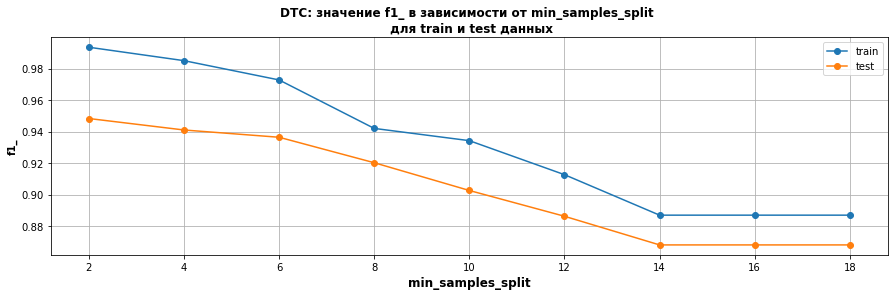

In [49]:
# min_samples_split - default

param = 'min_samples_split'
train_scores, test_scores = [], []
values = np.arange(2, 20, 2)
            
for num, i in enumerate(values):
    model = DecisionTreeClassifier(min_samples_split=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1_', weight='bold')
plt.title(f"DTC: значение f1_ в зависимости от {param} \n для train и test данных",
          weight='bold')
plt.grid()
plt.legend()
plt.show()

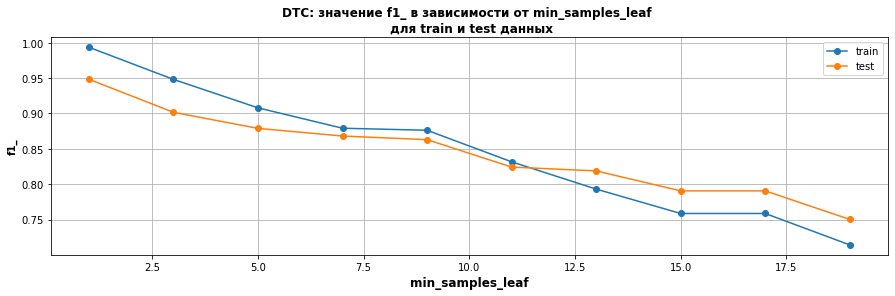

In [50]:
# min_samples_leaf - default

param = 'min_samples_leaf'
train_scores, test_scores = [], []
values = np.arange(1, 20, 2)
            
for num, i in enumerate(values):
    model = DecisionTreeClassifier(min_samples_leaf=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_ = get_score_model(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1_', weight='bold')
plt.title(f"DTC: значение f1_ в зависимости от {param} \n для train и test данных",
          weight='bold')
plt.grid()
plt.legend()
plt.show()

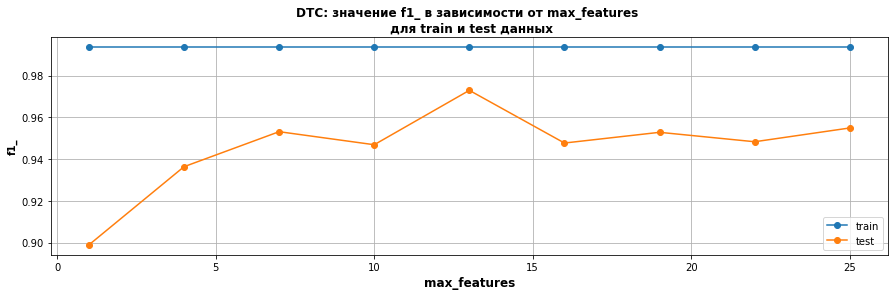

In [51]:
# 'max_features': [17, 19, 25]

param = 'max_features'
train_scores, test_scores = [], []
values = np.arange(1, 28, 3)
            
for num, i in enumerate(values):
    model = DecisionTreeClassifier(max_features=i, class_weight='balanced')
    model.fit(X_train, y_train)
    
    train_f1 = get_score_model(model, X_train, y_train)
    train_scores.append(train_f1)
    
    test_f1 = get_score_model(model, X_test, y_test)
    test_scores.append(test_f1)

plt.figure(figsize=(15, 4))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('f1_', weight='bold')
plt.title(f"DTC: значение f1_ в зависимости от {param} \n для train и test данных",
          weight='bold')
plt.grid()
plt.legend()
plt.show()

In [73]:
scoring = make_scorer(precision_score, average='weighted')
params = {
    'criterion' : ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [8, 10, 12, 14],
    'max_features': [17, 19, 25, 'auto']    
}

dtc = DecisionTreeClassifier(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_cv = GridSearchCV(dtc, params,
                      scoring=scoring, cv=cv, verbose=1)

In [74]:
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 25,
 'splitter': 'best'}

In [75]:
model_gs = grid_cv.best_estimator_
model_gs.fit(X_train, y_train)

y_pred = model_gs.predict(X_test)
y_score = model_gs.predict_proba(X_test)

metrics_class['DTC_GS'] = get_score_clf(y_test, y_test_bin, y_pred, y_score)

metrics_class

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1,OVR,OVO,DTC,DTC_GS
roc_auc_score,0.924,0.958,0.960,0.972,0.951,0.944,0.943,0.956
precision micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948,0.955
precision macro,0.605,0.845,0.910,0.861,0.722,0.708,0.869,0.871
recall micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948,0.955
recall macro,0.867,0.895,0.787,0.842,0.519,0.558,0.916,0.933
f1 micro,0.748,0.781,0.890,0.832,0.871,0.877,0.948,0.955
f1 macro,0.673,0.841,0.823,0.839,0.561,0.600,0.869,0.882


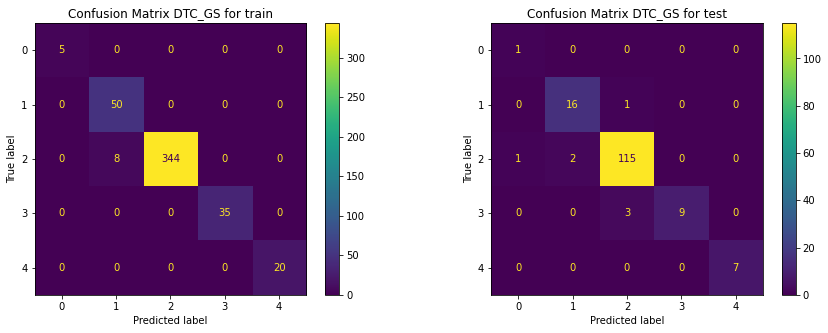

In [76]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].set_title('Confusion Matrix DTC_GS for train')
plot_confusion_matrix(model_gs, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix DTC_GS for test')
plot_confusion_matrix(model_gs, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

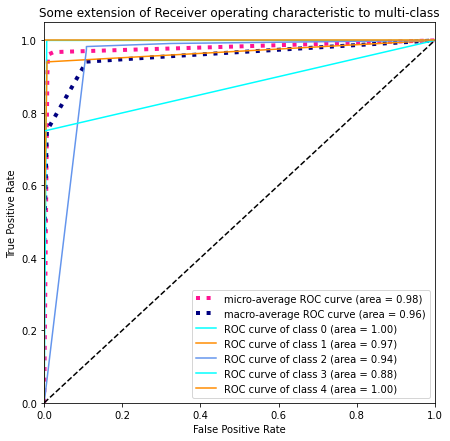

In [77]:
# Построение ROC-кривых

plot_roc_curve()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Построена модель "усредненного" классификатора. По всем метрикам данная модель лучше логистической регрессии, а также лучше baseline DecisionTree.
    </body>
</html>

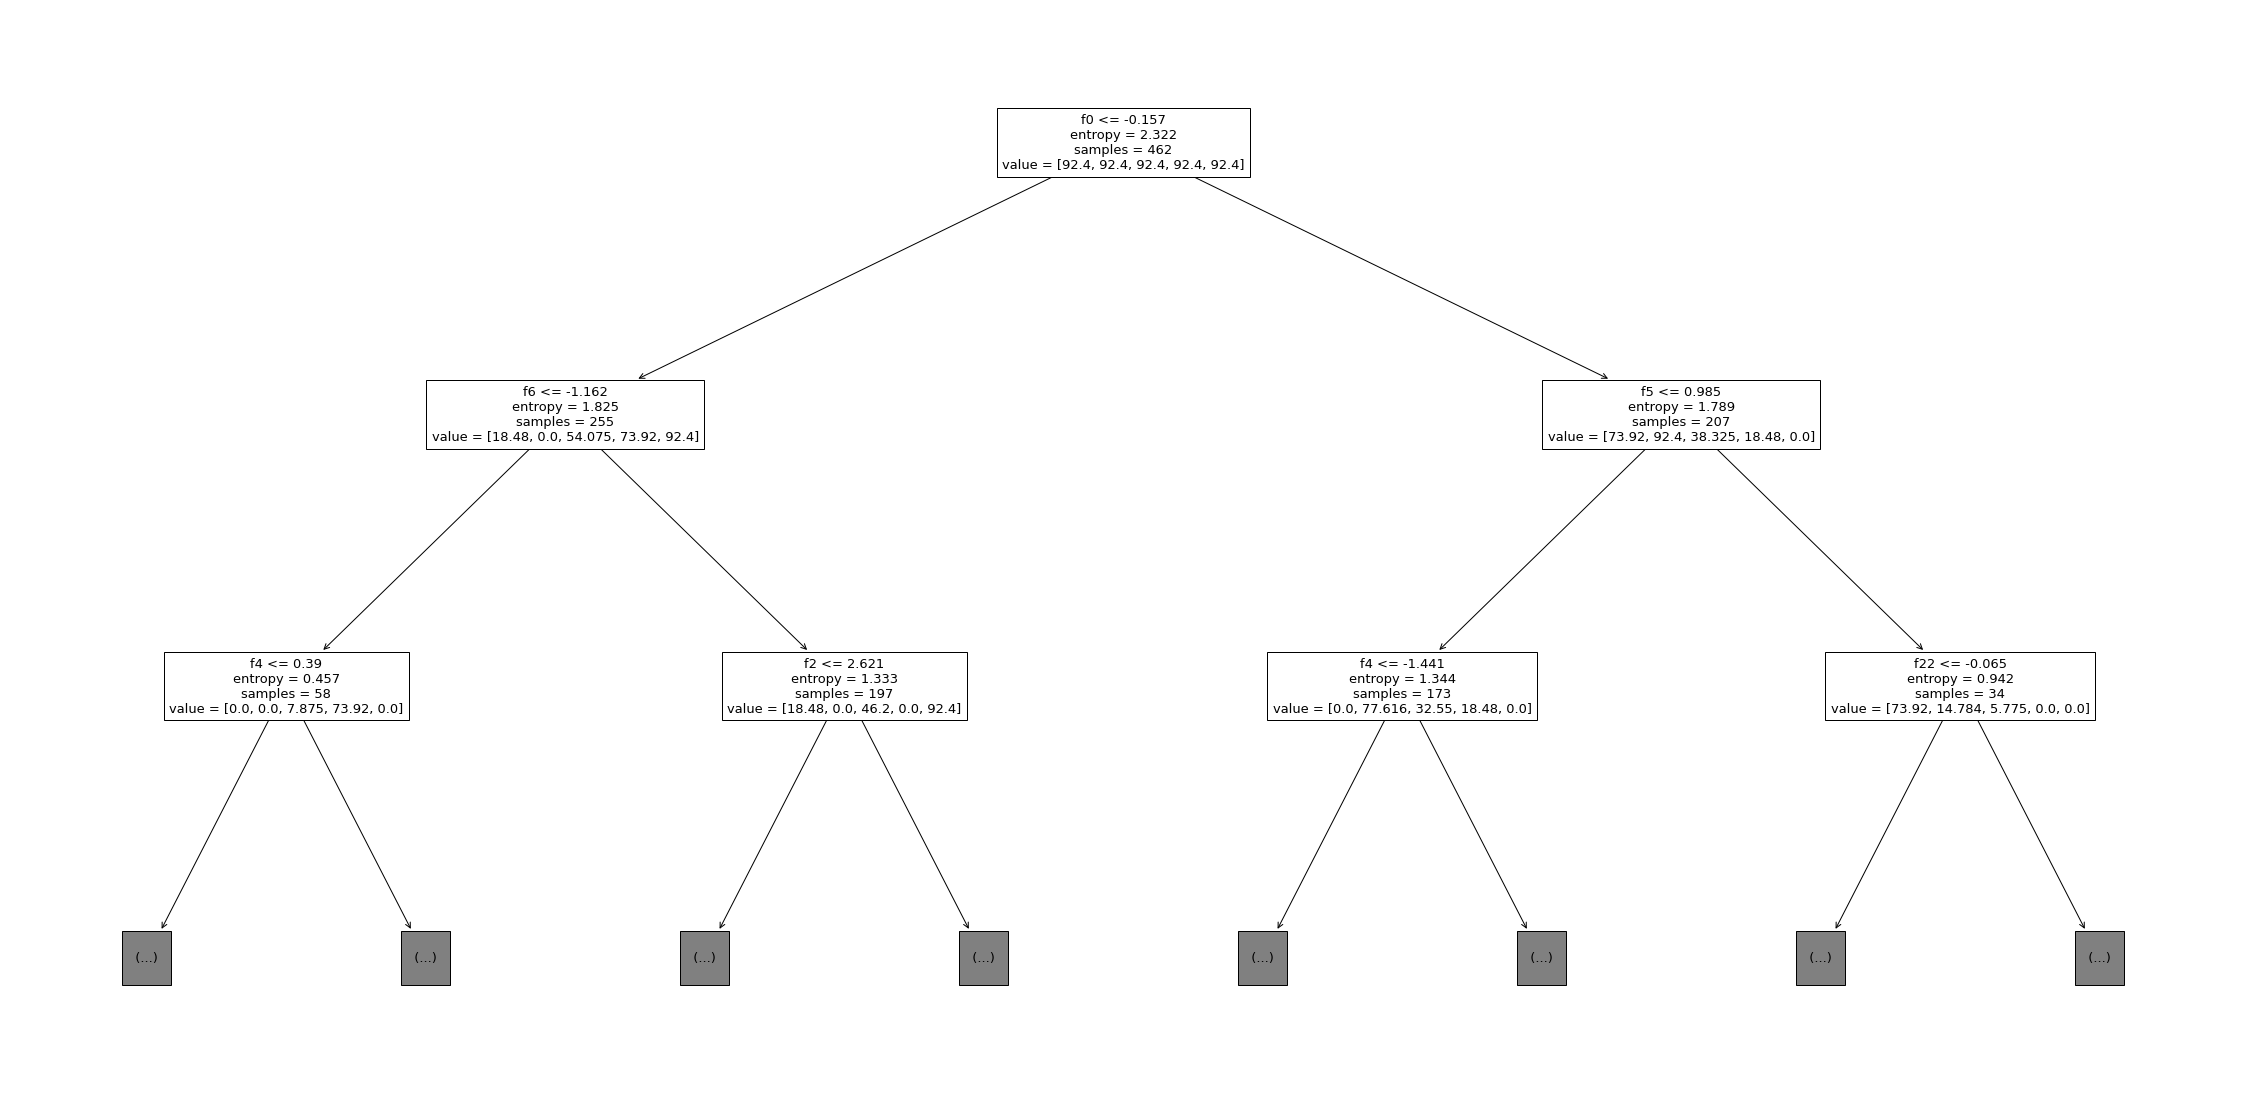

In [78]:
# Отображение дерева (начало)
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model_gs, feature_names = X.columns, max_depth=2)
plt.show()

In [79]:
# Вывод наиболее значимых параметров 

perm = PermutationImportance(model_gs, random_state=1).fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.1688 ± 0.0274,f0
0.1234 ± 0.0203,f22
0.1022 ± 0.0114,f4
0.0706 ± 0.0223,f6
0.0515 ± 0.0069,f2
0.0459 ± 0.0132,f5
0.0303 ± 0.0125,f23
0.0299 ± 0.0069,f16
0.0290 ± 0.0105,f1
0.0152 ± 0.0027,f10


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод по наиболее значимым параметрам для LogisticRegression и DecisionTree:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            В разделе EDA на матрице корреляций была заметна слабая и средняя корреляция целевой переменной с параметрами f2, f3, f5, f14, f18.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Топ 5 важных параметров:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            LogisticRegression - f4, f2, f3, f1, f5.  
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            DecisionTreeClassifier - f0, f22, f4, f6, f2.
    </body>
</html>

## Ансамблевые методы

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Ансамблевые методы построения моделей в большинстве задач дают точность выше, в особенности, если классы нелинейно разделимы. Для начала построим baseline модели и посмотрим, следует ли подбирать параметры.
    </body>
</html>

In [80]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
lgbc = LGBMClassifier()
cat = CatBoostClassifier(silent=True)

models = [rfc, gbc, xgbc, lgbc, cat]

In [81]:
metrics = pd.DataFrame()

for m in tqdm_notebook(models):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_score = m.predict_proba(X_test)

    metrics = metrics.append([get_score_clf(y_test, y_test_bin, y_pred, y_score)])

metrics.columns = ['roc_auc_score', 'precision micro', 'precision macro', 'recall micro', 
                   'recall macro', 'f1 micro', 'f1 macro']
metrics.index = ['RFC', 'GBC', 'XGBC', 'LGBMC', 'CAT']

metrics = metrics.T

  0%|          | 0/5 [00:00<?, ?it/s]

[13:41:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
metrics.style.highlight_max(color='lightgreen', axis=1)

,RFC,GBC,XGBC,LGBMC,CAT
roc_auc_score,1.000000,0.999000,0.998000,0.997000,0.999000
precision micro,0.994000,0.974000,0.968000,0.968000,0.968000
precision macro,0.998000,0.982000,0.981000,0.882000,0.981000
recall micro,0.994000,0.974000,0.968000,0.968000,0.968000
recall macro,0.983000,0.946000,0.941000,0.956000,0.941000
f1 micro,0.994000,0.974000,0.968000,0.968000,0.968000
f1 macro,0.990000,0.963000,0.959000,0.902000,0.959000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Как и предполагалось, без подбора параметров модели показывают результаты лучше, чем предыдущие алгоритмы. Выберем модель RandomForestClassifier в качестве лучшей, отобразим roc-auc кривые, confusion matrix, список наиболее значимых параметров и выведем итоговые результаты всех моделей.
    </body>
</html>

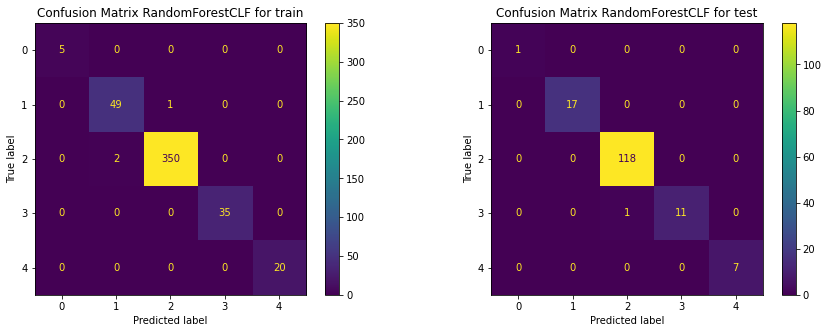

In [83]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].set_title('Confusion Matrix RandomForestCLF for train')
plot_confusion_matrix(rfc, X_train, y_train,
                      display_labels=set(y_train), ax=ax[0])

ax[1].set_title('Confusion Matrix RandomForestCLF for test')
plot_confusion_matrix(rfc, X_test, y_test,
                      display_labels=set(y_train), ax=ax[1])

plt.show()

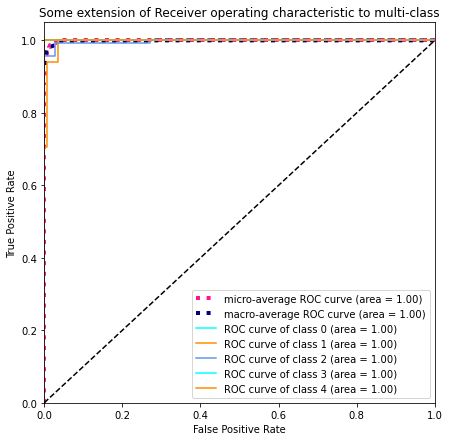

In [84]:
# Посторение ROC-кривых

plot_roc_curve()

In [86]:
# Объединим метрики с метриками предыдущих алгоритмов
metrics_result = pd.concat([metrics_class, metrics], axis=1, ignore_index=False)

In [87]:
metrics_result.style.highlight_max(color='lightgreen', axis=1)

,LR_baseline,LR_GS_pr,LR_GS_re,LR_GS_f1,OVR,OVO,DTC,DTC_GS,RFC,GBC,XGBC,LGBMC,CAT
roc_auc_score,0.924000,0.958000,0.960000,0.972000,0.951000,0.944000,0.943000,0.956000,1.000000,0.999000,0.998000,0.997000,0.999000
precision micro,0.748000,0.781000,0.890000,0.832000,0.871000,0.877000,0.948000,0.955000,0.994000,0.974000,0.968000,0.968000,0.968000
precision macro,0.605000,0.845000,0.910000,0.861000,0.722000,0.708000,0.869000,0.871000,0.998000,0.982000,0.981000,0.882000,0.981000
recall micro,0.748000,0.781000,0.890000,0.832000,0.871000,0.877000,0.948000,0.955000,0.994000,0.974000,0.968000,0.968000,0.968000
recall macro,0.867000,0.895000,0.787000,0.842000,0.519000,0.558000,0.916000,0.933000,0.983000,0.946000,0.941000,0.956000,0.941000
f1 micro,0.748000,0.781000,0.890000,0.832000,0.871000,0.877000,0.948000,0.955000,0.994000,0.974000,0.968000,0.968000,0.968000
f1 macro,0.673000,0.841000,0.823000,0.839000,0.561000,0.600000,0.869000,0.882000,0.990000,0.963000,0.959000,0.902000,0.959000


In [88]:
# Использование библиотеки shap для рассмотрения важных признаков (модель RandomForest)
import shap

In [148]:
explainer = shap.TreeExplainer(rfc, X_train, feature_dependence="independent")

shap_values = explainer.shap_values(X_test, check_additivity=False)

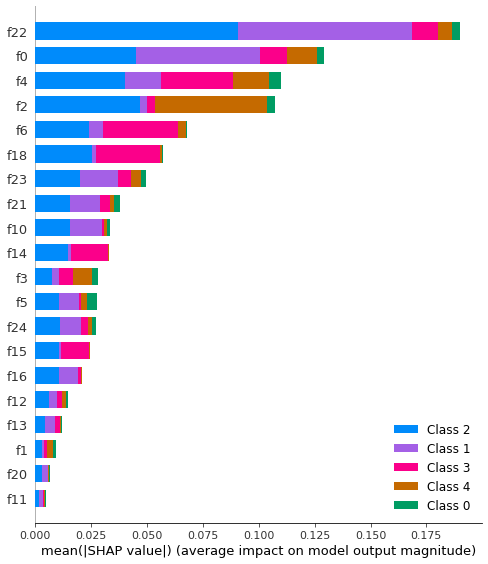

In [149]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Признаки расположены по степени их важности по оси OY, по оси OX находится значение Шепли.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Рассмотрим более детально важность признаков для каждого класса.
    </body>
</html>

In [150]:
# 5 классов, 155 объектов(Test), 27 признаков
np.shape(shap_values)

(5, 155, 27)

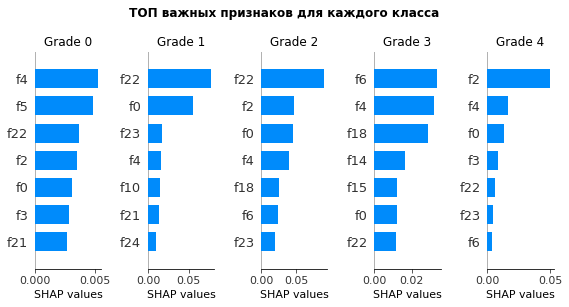

In [254]:
n = len(shap_values)

fig = plt.figure(figsize=(15,10))

for i in range(0, n):
    ax = fig.add_subplot(1, n, i + 1)
    shap.summary_plot(shap_values[i], X_test, plot_type='bar', max_display=7, show=False)
    ax.title.set_text(f"Grade {i}")
    ax.set_xlabel(r'SHAP values', fontsize=11)
    
plt.suptitle('ТОП важных признаков для каждого класса', weight='bold', size=12)
plt.tight_layout()
plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            На данном графике отображен топ-7 признаков для каждого класса, расположенных по степени из важности.
    </body>
</html>